In [3]:
import importlib

def install_if_not_installed(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}
        print(f"{package} has been successfully installed.")

# Check and install ucimlrepo if not installed
install_if_not_installed("ucimlrepo")

# Import and use ucimlrepo
import ucimlrepo

ucimlrepo is already installed.


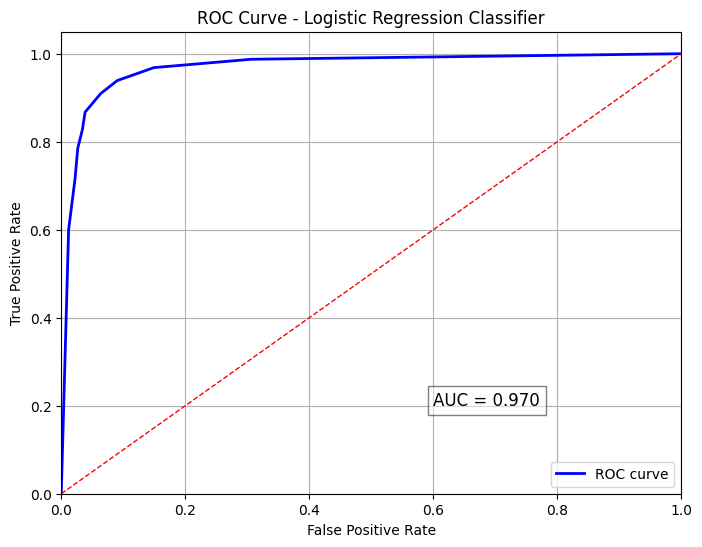

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

spambase = fetch_ucirepo(id=94)

X = pd.DataFrame(spambase.data.features)
y = pd.DataFrame(spambase.data.targets)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_normalized_values = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized_values, columns=X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Predicted probs. for the SPAM class
y_probs = model.predict_proba(X_test)[:, 1]

# Initialize lists to TPR and FPR
tpr_list = []
fpr_list = []

# Threshold values
thresholds = [threshold / 10 for threshold in range(0, 11)]

# TPR and FPR for each threshold
for threshold in thresholds:
    # Convert predicted probs. to binary predictions based on the threshold
    y_pred_binary = [1 if prob >= threshold else 0 for prob in y_probs]

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

    # TPR and FPR
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    # Append TPR and FPR to the lists
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Classifier')
plt.legend(loc="lower right")
plt.grid(True)

# Calculate AUC
auc = np.trapz(tpr_list, fpr_list)
plt.text(0.6, 0.2, f'AUC = {-auc:.3f}', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()